In [25]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import math
from sklearn.metrics import mean_absolute_error

In [26]:
input_views = pd.read_csv('Input.csv')
views_data = input_views.drop(['Unnamed: 0','Year'], axis=1)
selected_days = views_data.iloc[0:11520,:]
input_views

,Unnamed: 0,Year,Month,Day,Day-of-Week,Holiday,Minute-from-Midnight,views
0,0,2023.0,2.0,11.0,5.0,1.0,0.0,587.0
1,1,2023.0,2.0,11.0,5.0,1.0,1.0,583.0
2,2,2023.0,2.0,11.0,5.0,1.0,2.0,577.0
3,3,2023.0,2.0,11.0,5.0,1.0,3.0,573.0
4,4,2023.0,2.0,11.0,5.0,1.0,4.0,570.0
...,...,...,...,...,...,...,...,...
40315,40315,2023.0,1.0,14.0,5.0,0.0,1435.0,459.0
40316,40316,2023.0,1.0,14.0,5.0,0.0,1436.0,458.0
40317,40317,2023.0,1.0,14.0,5.0,0.0,1437.0,454.0
40318,40318,2023.0,1.0,14.0,5.0,0.0,1438.0,451.0


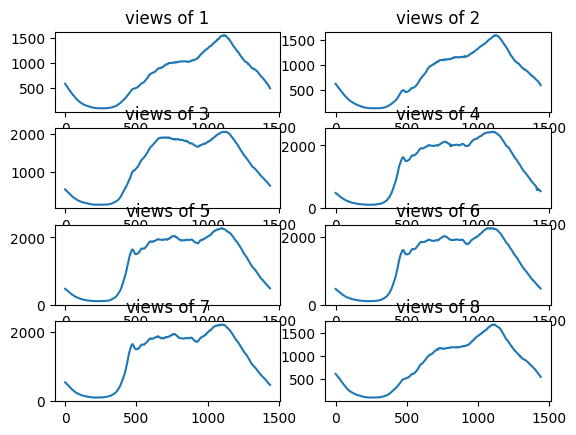

In [27]:
be = 0
en =1440
i = 1
for day in range(0,8):
    day_min = selected_days.iloc[be:en,4]
    day_views = selected_days.iloc[be:en,5]
    plt.subplot(4, 2, i)
    plt.plot(day_min, day_views)
    plt.title('views of %d'%(i))
    i = i+1
    be = en
    en = en+1440
plt.show()

In [28]:
x = views_data.drop('views', axis=1)
y = views_data.views
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [29]:
views_att = views_data.drop('views', axis = 1)
scaled_data = scale(views_att)
scaled_views_data = pd.DataFrame(scaled_data, index = views_att.index, columns = views_att.columns)
scaled_x = scaled_views_data
scaled_y = views_data.views
scaled_x_train, scaled_x_test, scaled_y_train, scaled_y_test = train_test_split(scaled_x, scaled_y, test_size = 0.3, random_state = 42)

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

In [20]:
etr = ExtraTreesRegressor(max_features=0.3)
etr.fit(x_train, y_train)
etr_y_predict = etr.predict(x_test)

2.2697444634728114
1.2542498359683378


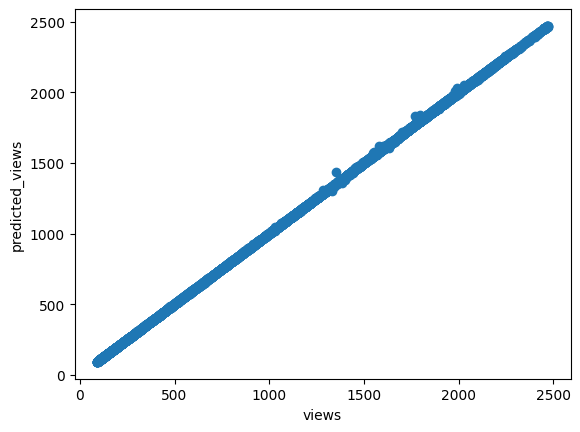

In [21]:
etr_mse = mean_squared_error(y_test,etr_y_predict)
print(math.sqrt(etr_mse))
print(mean_absolute_error(y_test,etr_y_predict))
plt.scatter(y_test, etr_y_predict)
plt.xlabel('views')
plt.ylabel('predicted_views')
plt.show()

In [22]:
etr.fit(scaled_x_train, scaled_y_train)
scaled_etr_y_predict = etr.predict(scaled_x_test)

2.1664443288926303
1.2207954033079278


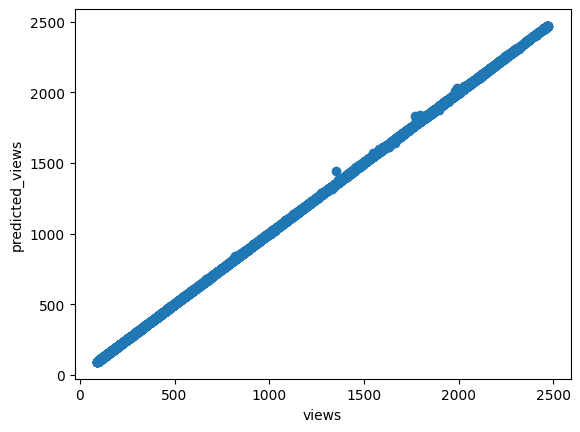

In [23]:
scaled_etr_mse = mean_squared_error(scaled_y_test,scaled_etr_y_predict)
print(math.sqrt(scaled_etr_mse))
print(mean_absolute_error(scaled_y_test,scaled_etr_y_predict))
plt.scatter(scaled_y_test, scaled_etr_y_predict)
plt.xlabel('views')
plt.ylabel('predicted_views')
plt.show()

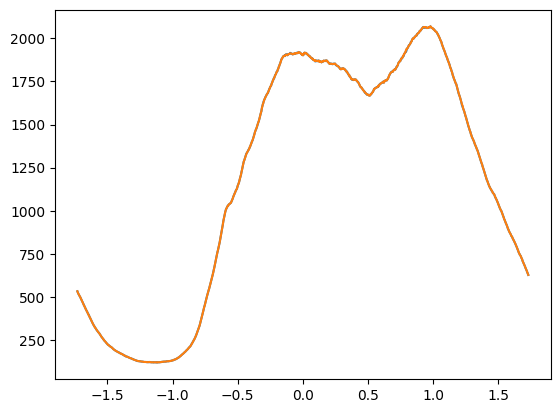

In [24]:
selected_day_val = scaled_views_data.iloc[2880:4320,0:5]
y_selected_day_predict = etr.predict(selected_day_val)
selected_day_min = scaled_views_data.iloc[2880:4320,4]
selected_day_views = views_data.iloc[2880:4320,5]
plt.plot(selected_day_min,selected_day_views)
plt.plot(selected_day_min, y_selected_day_predict)